In [1]:
"""
refer to azure cognitive service SDK for python 
all SDK  for all cognitive services: 
https://azure.microsoft.com/en-us/resources/samples/cognitive-services-python-sdk-samples/

for computer vision quick start guide:
https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/quickstarts/python
"""
import json
from pprint import pprint

with open('cvservice.txt') as f:
    data = json.load(f)

pprint(data['keys'][0].keys())

dict_keys(['azure_cv_service'])


In [2]:
import time 
import requests
# encounter error when importing cv2 use the following to install in anaconda prompt
#pip install opencv-python
#pip install opencv-contrib-python
import cv2
import operator
import numpy as np
from __future__ import print_function

# Import library to display results
import matplotlib.pyplot as plt
%matplotlib inline 
# Display images within Jupyter
_key=data['keys'][0]['azure_cv_service']

# Variables
_region = 'westeurope' #Here you enter the region of your subscription
_url = 'https://{}.api.cognitive.microsoft.com/vision/v1.0/'.format(_region)
vision_analyze_url = _url + "analyze"
print("url for api call",vision_analyze_url)

_maxNumRetries = 10

url for api call https://westeurope.api.cognitive.microsoft.com/vision/v1.0/analyze


In [3]:

image_url='https://oxfordportal.blob.core.windows.net/vision/Analysis/3.jpg'
import requests
headers  = {'Ocp-Apim-Subscription-Key': _key }
params   = {'visualFeatures': 'Categories,Description,Color'}
data     = {'url': image_url}
response = requests.post(vision_analyze_url, headers=headers, params=params, json=data)
response.raise_for_status()
analysis = response.json()
print(analysis)
image_caption = analysis["description"]["captions"][0]["text"].capitalize()
print(image_caption)

{'categories': [{'name': 'trans_trainstation', 'score': 0.98828125}], 'description': {'tags': ['train', 'platform', 'building', 'station', 'track', 'walking', 'subway', 'board', 'pulling', 'holding', 'people', 'man', 'standing', 'waiting', 'luggage', 'woman', 'umbrella'], 'captions': [{'text': 'a person waiting for a train at a train station', 'confidence': 0.6548414048450634}]}, 'color': {'dominantColorForeground': 'Black', 'dominantColorBackground': 'Black', 'dominantColors': ['Black'], 'accentColor': '484B83', 'isBwImg': False}, 'requestId': '002c4b8c-f2f2-44bb-8f46-7ee409a837a2', 'metadata': {'height': 1155, 'width': 1500, 'format': 'Jpeg'}}
A person waiting for a train at a train station


In [4]:
def processRequest( url, json, data, headers, params ):

    """
    Helper function to process the request to Project Oxford

    Parameters:
    json: Used when processing images from its URL. See API Documentation
    data: Used when processing image read from disk. See API Documentation
    headers: Used to pass the key information and the data type request
    """

    retries = 0
    result = None

    while True:

        response = requests.request( 'post', url, json = json, data = data, headers = headers, params = params )

        if response.status_code == 429: 

            print( "Message: %s" % ( response.json() ) )

            if retries <= _maxNumRetries: 
                time.sleep(1) 
                retries += 1
                continue
            else: 
                print( 'Error: failed after retrying!' )
                break

        elif response.status_code == 200 or response.status_code == 201:

            if 'content-length' in response.headers and int(response.headers['content-length']) == 0: 
                result = None 
            elif 'content-type' in response.headers and isinstance(response.headers['content-type'], str): 
                if 'application/json' in response.headers['content-type'].lower(): 
                    result = response.json() if response.content else None 
                elif 'image' in response.headers['content-type'].lower(): 
                    result = response.content
        else:
            print( "Error code: %d" % ( response.status_code ) )
            print( "Message: %s" % ( response.json() ) )

        break
        
    return result

In [5]:
def renderResultOnImage( result, img, incl_prob ):
    
    """Display the obtained results onto the input image"""

    R = int(result['color']['accentColor'][:2],16)
    G = int(result['color']['accentColor'][2:4],16)
    B = int(result['color']['accentColor'][4:],16)

    cv2.rectangle( img,(0,0), (img.shape[1], img.shape[0]), color = (R,G,B), thickness = 25 )
    

    if 'categories' in result:
        categoryName = sorted(result['categories'], key=lambda x: x['score'])[0]['name']
        if incl_prob:
            prob=result['categories'][0]['score']
            categoryName+=' probability score : '+str(round(prob,4))
        cv2.putText( img, categoryName, (30,70), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 3 )

result {'name': 'trans_trainstation', 'score': 0.98828125}


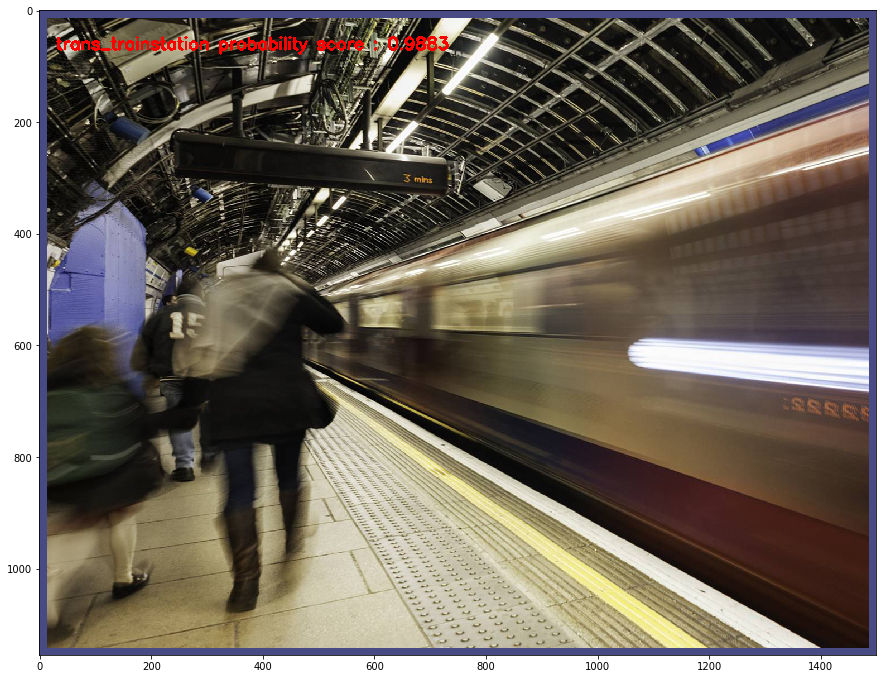

In [6]:

# URL direction to image
urlImage = 'https://oxfordportal.blob.core.windows.net/vision/Analysis/3.jpg'

                        

# Computer Vision parameters
params = { 'visualFeatures' : 'Color,Categories'} 

headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key
headers['Content-Type'] = 'application/json' 

json = { 'url': urlImage } 
data = None

result = processRequest(vision_analyze_url, json, data, headers, params )
print("result",result['categories'][0])

if result is not None:
    # Load the original image, fetched from the URL
    arr = np.asarray( bytearray( requests.get( urlImage ).content ), dtype=np.uint8 )
    img = cv2.cvtColor( cv2.imdecode( arr, -1 ), cv2.COLOR_BGR2RGB )

    renderResultOnImage( result, img,True )

    ig, ax = plt.subplots(figsize=(15, 20))
    ax.imshow( img )

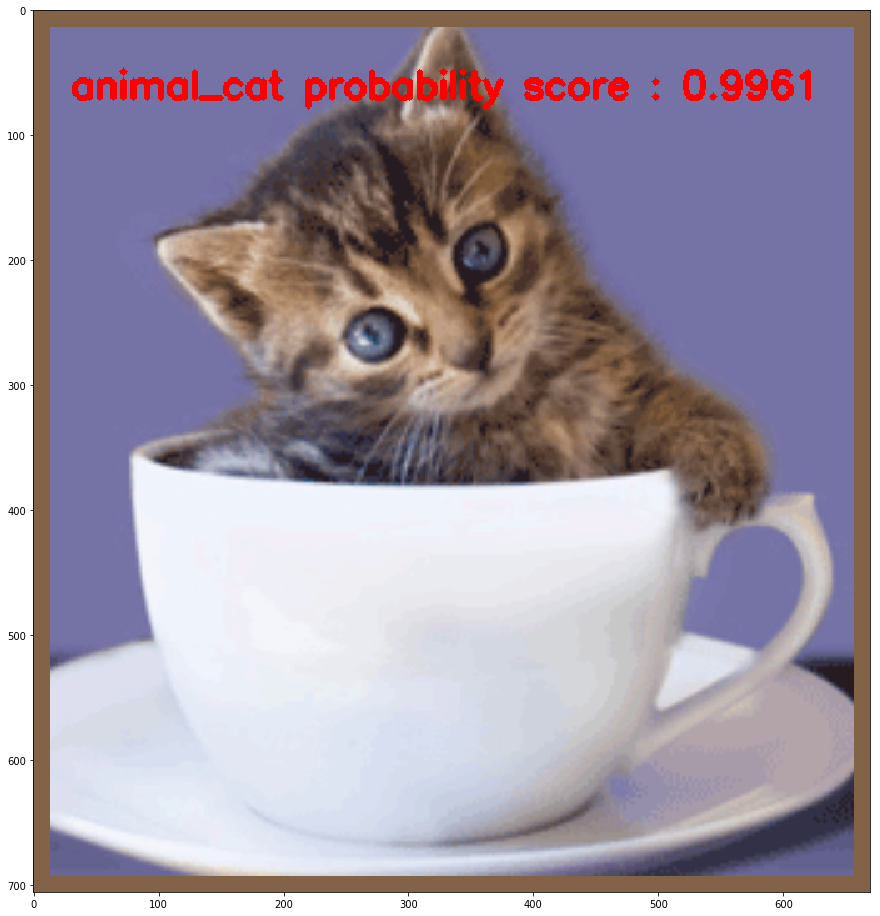

In [12]:
# Load raw image file into memory
import os
import sys
pathToFileInDisk="C:\\Users\\zecharpy\\Desktop\\zeno_azure_toolkit\\tinycat.png"

with open( pathToFileInDisk, 'rb' ) as f:
    data = f.read()
    
# Computer Vision parameters
params = { 'visualFeatures' : 'Color,Categories'} 

headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key
headers['Content-Type'] = 'application/octet-stream'

json = None

result = processRequest( vision_analyze_url,json, data, headers, params )

if result is not None:
    # Load the original image, fetched from the URL
    data8uint = np.frombuffer( data, np.uint8 ) # Convert string to an unsigned int array
    img = cv2.cvtColor( cv2.imdecode( data8uint, cv2.IMREAD_COLOR ), cv2.COLOR_BGR2RGB )

    renderResultOnImage( result, img ,True)

    ig, ax = plt.subplots(figsize=(15, 20))
    ax.imshow( img )

In [8]:
def processTxTRequest(url, json, data, headers, params ):

    """
    Helper function to process the request to Project Oxford

    Parameters:
    json: Used when processing images from its URL. See API Documentation
    data: Used when processing image read from disk. See API Documentation
    headers: Used to pass the key information and the data type request
    """

    retries = 0
    result = None

    while True:
        response = requests.request( 'post', url, json = json, data = data, headers = headers, params = params )

        if response.status_code == 429:
            print( "Message: %s" % ( response.json() ) )
            if retries <= _maxNumRetries: 
                time.sleep(1) 
                retries += 1
                continue
            else: 
                print( 'Error: failed after retrying!' )
                break
        elif response.status_code == 202:
            result = response.headers['Operation-Location']
        else:
            print( "Error code: %d" % ( response.status_code ) )
            print( "Message: %s" % ( response.json() ) )
        break
        
    return result

In [9]:
def getOCRTextResult( operationLocation, headers ):
    """
    Helper function to get text result from operation location

    Parameters:
    operationLocation: operationLocation to get text result, See API Documentation
    headers: Used to pass the key information
    """

    retries = 0
    result = None

    while True:
        response = requests.request('get', operationLocation, json=None, data=None, headers=headers, params=None)
        if response.status_code == 429:
            print("Message: %s" % (response.json()))
            if retries <= _maxNumRetries:
                time.sleep(1)
                retries += 1
                continue
            else:
                print('Error: failed after retrying!')
                break
        elif response.status_code == 200:
            result = response.json()
        else:
            print("Error code: %d" % (response.status_code))
            print("Message: %s" % (response.json()))
        break

    return result


In [10]:
def showTxTResultOnImage( result, img ):
    
    """Display the obtained results onto the input image"""
    img = img[:, :, (2, 1, 0)]
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.imshow(img, aspect='equal')

    lines = result['recognitionResult']['lines']

    for i in range(len(lines)):
        words = lines[i]['words']
        for j in range(len(words)):
            tl = (words[j]['boundingBox'][0], words[j]['boundingBox'][1])
            tr = (words[j]['boundingBox'][2], words[j]['boundingBox'][3])
            br = (words[j]['boundingBox'][4], words[j]['boundingBox'][5])
            bl = (words[j]['boundingBox'][6], words[j]['boundingBox'][7])
            text = words[j]['text']
            x = [tl[0], tr[0], tr[0], br[0], br[0], bl[0], bl[0], tl[0]]
            y = [tl[1], tr[1], tr[1], br[1], br[1], bl[1], bl[1], tl[1]]
            line = Line2D(x, y, linewidth=3.5, color='red')
            ax.add_line(line)
            ax.text(tl[0], tl[1] - 2, '{:s}'.format(text),
            bbox=dict(facecolor='blue', alpha=0.5),
            fontsize=14, color='white')

    plt.axis('off')
    plt.tight_layout()
    plt.draw()
    plt.show()

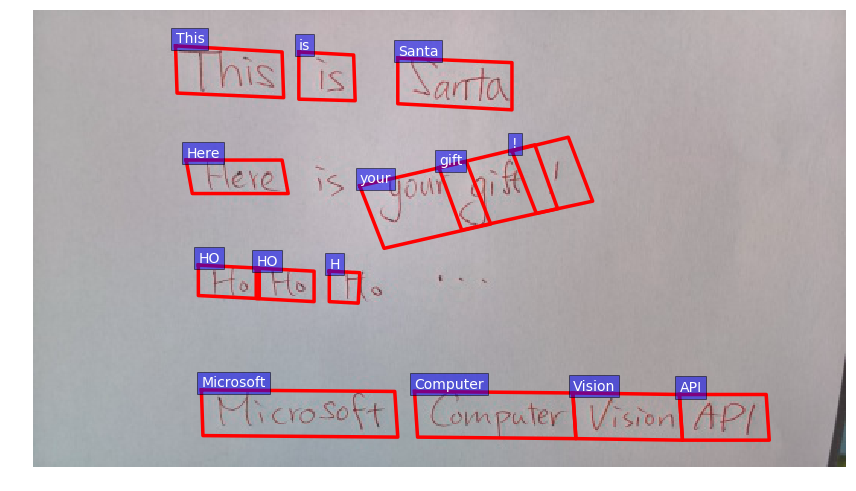

In [11]:
#extra libraries
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline 
# Load raw image file into memory
texturl=_url +'RecognizeText'
pathToFileInDisk = "C:\\Users\\zecharpy\\Desktop\\zeno_azure_toolkit\\handwritter_test.jpg"


im = cv2.imread(pathToFileInDisk)

height, width = im.shape[:2]


thumbnail = cv2.resize(im, (int(width/10), int(height/10)), interpolation = cv2.INTER_AREA)
cv2.imwrite("resize" + ".jpg", thumbnail)

pathToFileInDisk = "C:\\Users\\zecharpy\\Desktop\\zeno_azure_toolkit\\resize.jpg"

with open(pathToFileInDisk, 'rb') as f:
    data = f.read()
    
# Computer Vision parameters
params = {'handwriting' : 'true'}

headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key
headers['Content-Type'] = 'application/octet-stream'

json = None

operationLocation = processTxTRequest(texturl, json, data, headers, params)

result = None
if (operationLocation != None):
    headers = {}
    headers['Ocp-Apim-Subscription-Key'] = _key
    while True:
        time.sleep(1)
        result = getOCRTextResult(operationLocation, headers)
        if result['status'] == 'Succeeded' or result['status'] == 'Failed':
            break

# Load the original image, fetched from the URL
if result is not None and result['status'] == 'Succeeded':
    data8uint = np.frombuffer (data, np.uint8)  # Convert string to an unsigned int array
    img = cv2.cvtColor(cv2.imdecode(data8uint, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
    showTxTResultOnImage(result, img)